In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(array([ 3.,  4.,  6., 25., 20., 13., 11., 12.,  4.,  2.]),
 array([-2.53357492, -1.99873651, -1.46389811, -0.92905971, -0.3942213 ,
         0.1406171 ,  0.6754555 ,  1.21029391,  1.74513231,  2.27997071,
         2.81480911]),
 <BarContainer object of 10 artists>)

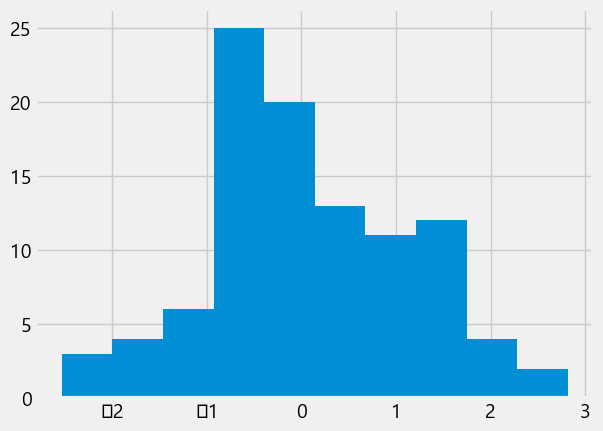

In [106]:
plt.hist(np.random.randn(100))

# 1. 타이타닉 데이터 다루기

In [107]:
titanic = pd.read_csv('data/titanic.csv')

titanic['age'] = pd.to_numeric(titanic['age'], errors='coerce')
# to_numeric은 데이터를 숫자 형식으로 바꿔주는 역할을 한다.
# plt.hist(titanic['age'])
# plt.show()

In [108]:
titanic['pclass'] = titanic['pclass'].replace(['NaN'],[None]).astype(float)
# replace 메소드를 사용해서 'NaN' 누락데이터를 없음으로 바꿔줬다.
# plt.hist(titanic['pclass'])

Text(0.5, 1.0, '3rd Class')

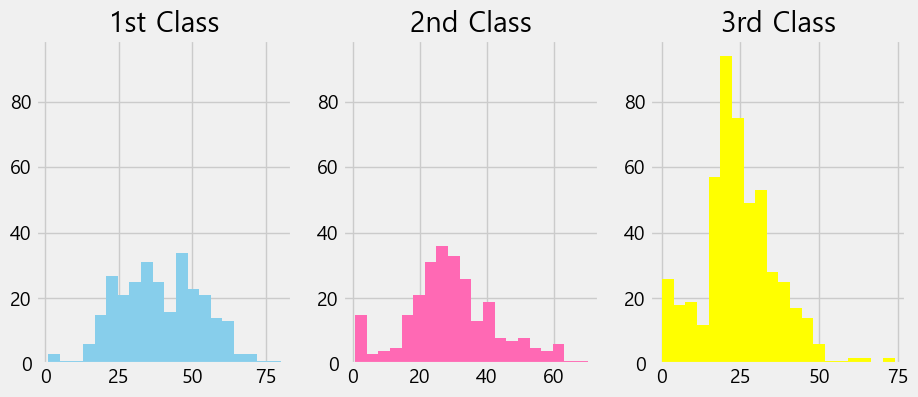

In [109]:
# 타이타닉 1,2,3 등급에 따른 연령 때 비율
pclass_1 = titanic[titanic['pclass']==1]['age']
pclass_2 = titanic[titanic['pclass']==2]['age']
pclass_3 = titanic[titanic['pclass']==3]['age']

# subplot으로 각각의 데이터를 그래프로 그리는 함수
plt.figure(figsize=(10, 4))
ax = plt.subplot(1,3,1)
plt.hist(pclass_1, color='skyblue', bins=20)
plt.title('1st Class')

plt.subplot(1,3,2, sharey = ax)
plt.hist(pclass_2, color='hotpink', bins=20)
plt.title('2nd Class')

plt.subplot(1,3,3, sharey = ax)
plt.hist(pclass_3, color='yellow',  bins=20)
plt.title('3rd Class')

<Axes: title={'center': 'Titanic by Sex'}>

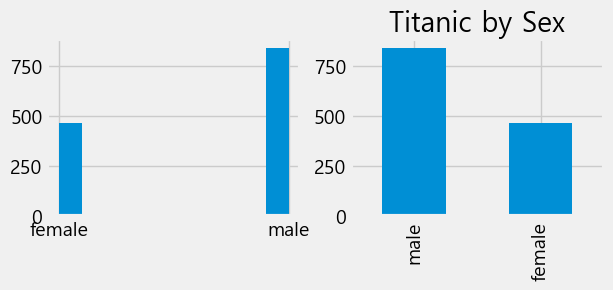

In [110]:
plt.subplot(2,2,1)
plt.hist(titanic['sex'])

plt.subplot(2,2,2)
titanic.sex.value_counts().plot(kind='bar',title='Titanic by Sex')

# 2. 데이터 만들어 추출하기

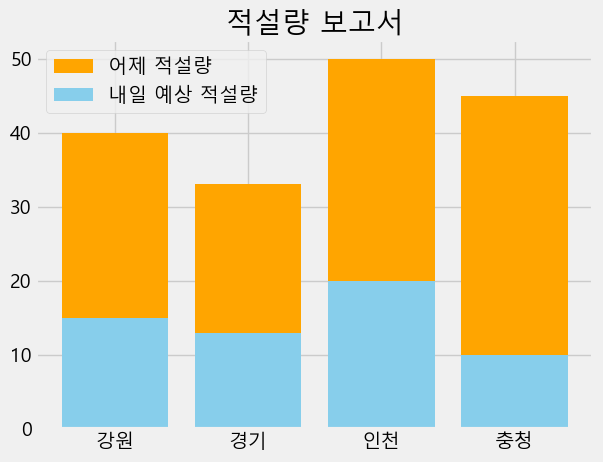

In [111]:
dj = [25,20,30,35]
so = [15,13,20,10]
db = ['강원','경기','인천','충청']
# 변수 데이터들

# bottom=so는 dj와 겹치지 않고 블록처럼 쌓는 거
plt.bar(db, dj, bottom=so, label='어제 적설량', color='orange')
plt.bar(db, so, label='내일 예상 적설량', color='skyblue')

# 굴림 폰트 적용법
plt.rc('font', family='Malgun Gothic')
plt.title('적설량 보고서')
plt.legend()

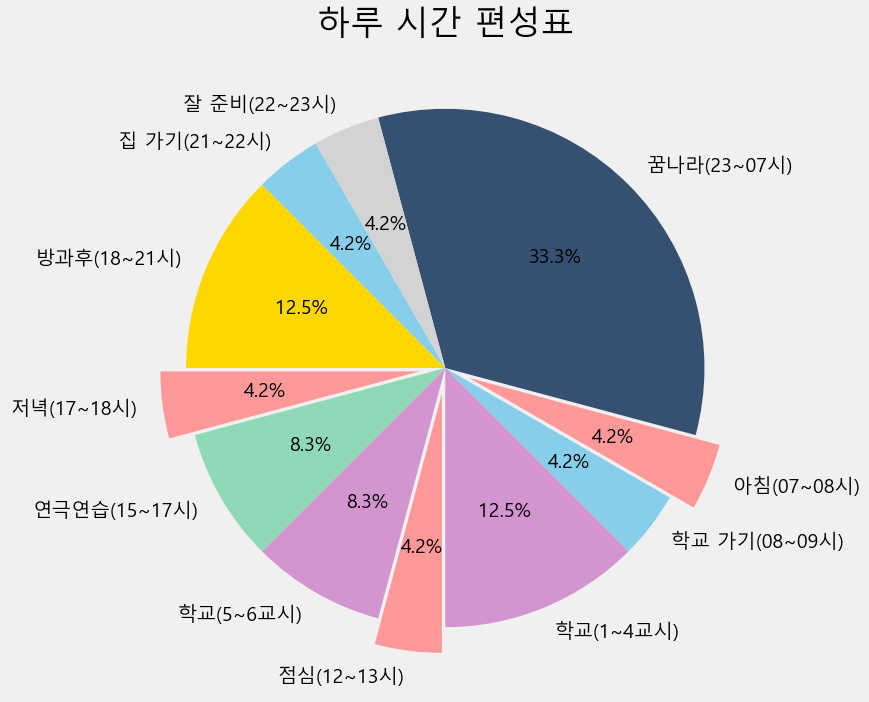

In [112]:
time = [40,5,5,15,5,10,10,5,15,5,5]
labels = ['꿈나라(23~07시)','아침(07~08시)','학교 가기(08~09시)','학교(1~4교시)','점심(12~13시)',
          '학교(5~6교시)','연극연습(15~17시)','저녁(17~18시)','방과후(18~21시)','집 가기(21~22시)',
          '잘 준비(22~23시)']
colors = ['#355070','#ff9999','skyblue','#d395d0','#ff9999',
          '#d395d0','#8fd9b6','#ff9999','gold','skyblue','lightgray']

plt.figure(figsize=(8,8))
plt.pie(
    time,
    labels=labels,
    colors=colors,
    explode=(0,0.1,0,0,0.1,0,0,0.1,0,0,0),
    autopct='%.1f%%',
    startangle=105,
    counterclock=False)
plt.title('하루 시간 편성표', fontsize=24)
plt.show()

# 3. 부동산 데이터 다루기

In [113]:
hom = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])
hom.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [114]:
sales_by_month = hom['date'].dt.month.value_counts()

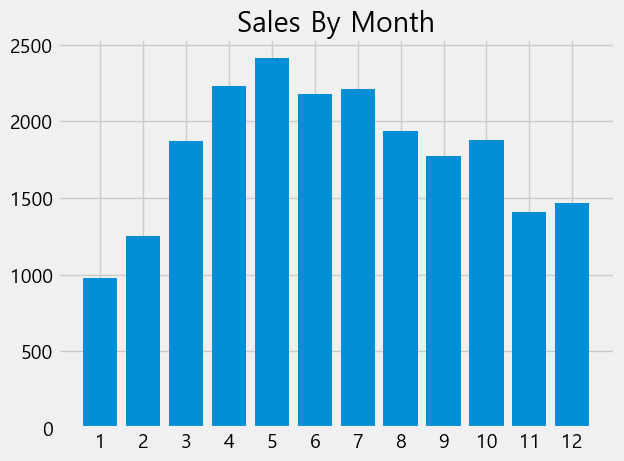

In [115]:
plt.title('Sales By Month')
plt.bar(sales_by_month.index.values, sales_by_month)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()
# 이사는 5월에 가장 많이 하군

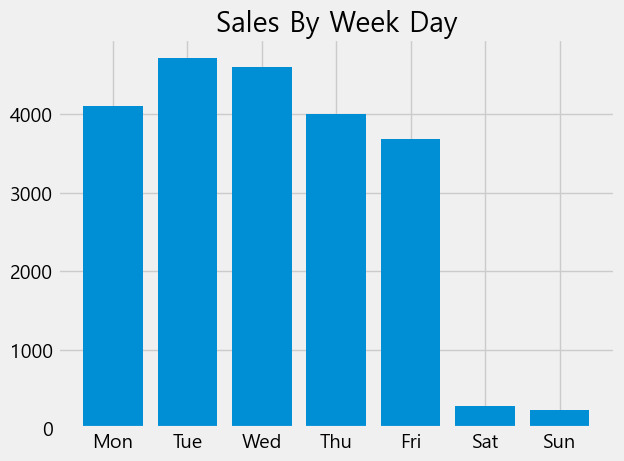

In [116]:
sales_by_day = hom['date'].dt.dayofweek.value_counts()
w=('Tue','Wed','Mon','Thu','Fri','Sat','Sun')

plt.title('Sales By Week Day')
plt.bar(sales_by_day.index.values, sales_by_day)
plt.xticks(sales_by_day.index.values, w)
plt.show()

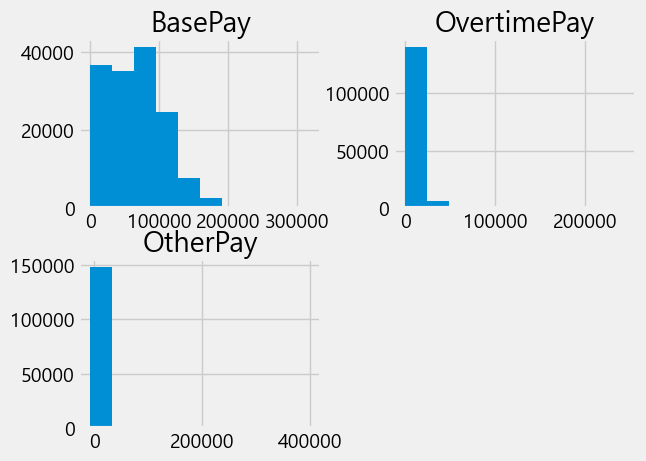

In [117]:
salaries = pd.read_csv('data/Salaries.csv', low_memory=False)

salaries['BasePay'] = pd.to_numeric(salaries['BasePay'], errors='coerce').fillna(0)
salaries['OvertimePay'] = pd.to_numeric(salaries['OvertimePay'], errors='coerce').fillna(0)
salaries['OtherPay'] = pd.to_numeric(salaries['OtherPay'], errors='coerce').fillna(0)

df = salaries[['EmployeeName','BasePay','OvertimePay','OtherPay']]
df.set_index('EmployeeName', inplace=True)
df.hist(bins=10)

plt.style.use('fivethirtyeight')

<Axes: >

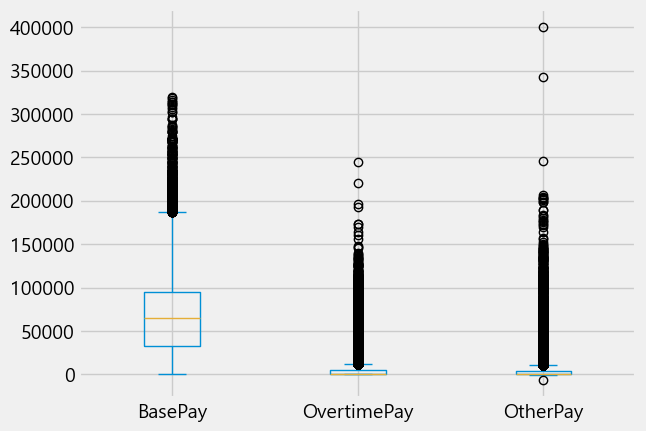

In [118]:
df.plot(kind='box')

<Axes: xlabel='EmployeeName'>

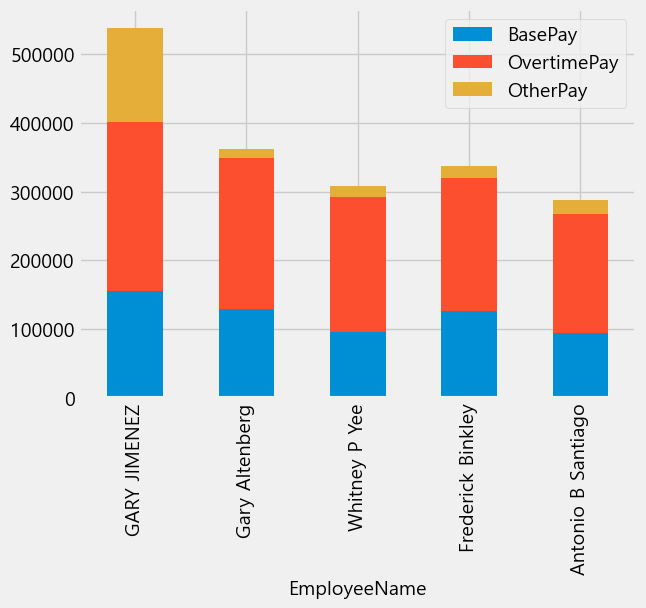

In [131]:
df.sort_values('OvertimePay', ascending=False).head().plot(kind='bar', stacked=True)